Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Предоставлены данные до 2016 года. Планируем кампанию на 2017-й. 

Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

pd.options.display.max_columns = None # Использовал для просмотра широких таблиц
pd.options.display.max_rows = None

## Изучение данных из файла

In [284]:
# Загружаем файл
df = pd.read_csv('/datasets/games.csv', sep=',')

# Посмотрим первые 5 строк таблицы
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [285]:
# Смотрим общую информацию о таблице
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [286]:
# Проверим датафрейм на наличие дубликатов
df.duplicated().sum() 

0

### Выводы

Есть пропуски в столбцах.

Все столбцы нужно привести к нижнему регистру.

Дубликаты отсутствуют.

## Предобработка данных

### Приведение названий столбцов к нижнему регистру

In [287]:
# Исправим наименование столбца
df.rename(columns={'Name': 'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 
                   'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
                  'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'}, inplace=True)
# Посмотрим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка столбца name

In [288]:
# Смотрим на наличие артефактов
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [289]:
# Посмотрим строки, в которых отсутствует наименование игры
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Выявили, что строки со значением NaN для столбца name и genre одни и те же, причем относятся к играм релиз которых состоялся 1993 году.

In [290]:
# Учитывая, что для анализа эти строки использоваться не будут по нескольки причинам - недостаток данных и год выпуска игр - удалим их
df = df.dropna(subset = ['name'])
# Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Обработка столбца platform

In [291]:
# Смотрим на наличие артефактов
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Обработка столбца eu_sales

In [292]:
# Смотрим на наличие артефактов
df['eu_sales'].unique()

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

### Обработка столбца na_sales

In [293]:
# Смотрим на наличие артефактов
df['na_sales'].unique()

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

### Обработка столбца jp_sales

In [294]:
# Смотрим на наличие артефактов
df['jp_sales'].unique()

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

### Создание столбца суммарных продаж во всех регионах

In [295]:
df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']
# Посмотрим результат
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Обработка столбца year_of_release

In [296]:
# Смотрим на наличие артефактов
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [297]:
# Посмотрим сколько всего пропусков
df['year_of_release'].isnull().sum()

269

In [298]:
# Посмотрим строки, в которых отсутствует год релиза игры
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09


In [299]:
# Сделаем срез по названию одной из игр
df.query('name == "Tomb Raider (2013)"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
646,Tomb Raider (2013),PS3,2013.0,Action,0.60,1.26,0.08,0.48,NaN,NaN,NaN,2.42
910,Tomb Raider (2013),X360,2013.0,Action,0.86,0.84,0.01,0.17,NaN,NaN,NaN,1.88
1384,Tomb Raider (2013),PS4,2014.0,Action,0.47,0.65,0.06,0.22,NaN,NaN,NaN,1.40
3309,Tomb Raider (2013),XOne,2014.0,Action,0.35,0.21,0.00,0.05,NaN,NaN,NaN,0.61
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,0.35


Получается, что данные для заполнения пропусков можно взять от релизов той же игры, вышедшей для других платформ

In [300]:
# Учитывая, что выход игры для разных платформ мог происходить не в один год заполним пропуски
df['year_of_release'] = df.groupby('name')['year_of_release'].apply(lambda s: s.fillna(s.mean()))

In [301]:
# Посмотрим сколько пропусков осталось
df['year_of_release'].isnull().sum()

146

In [302]:
# Посмотрим какие игры остались без указания года выпуска
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,1.46
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN,1.30
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN,1.25
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T,1.12
1984,Legacy of Kain: Soul Reaver,PS,NaN,Action,0.58,0.40,0.00,0.07,91.0,9,T,1.05


Изучил список и посмотрел даты выхода несколькольких игр с наибольшим количеством проданных копий, например - Frogger's Adventures: Temple of the Frog - 2001 год выпуска,  Rock Band для 4 платформ - 2006 год выпуска, Adventure - 1979. 

In [303]:
# Посмотрим для каких платформ выпускались игры, в которых не указан год выхода

df1 = df[df['year_of_release'].isnull()]
df1['platform'].value_counts()

DS      22
PS2     21
Wii     19
2600    16
X360    12
PS3     11
GBA      9
XB       7
PS       7
PSP      6
3DS      5
PC       4
GC       4
N64      1
GB       1
PSV      1
Name: platform, dtype: int64

In [304]:
# Посчитаю количество проданных копия без указания года релиза
df1['total_sales'].sum()

43.71

In [305]:
# Посчитаю общее количество проданных копий
df['total_sales'].sum()

8913.29

Получается, что общее количество проданных копий без указания года релиза - 0,48 % от общего количества

In [306]:
# Посмотрим применительно к платформам, по которым будем делать анализ продаж на 2017
df1.query('platform == "3DS"')['total_sales'].sum()

0.47

In [307]:
# Посмотрим сколько всего было продано копий для платформы 3DS
df.query('platform == "3DS"')['total_sales'].sum()

259.0

Исходя из того, что: 
- оставшихся строк с неопределенным годом релиза всего 146, что  составляет 0,87 % от общего количества
- общее количество проданных копий без указания года релиза  - 0,48 % от общего количества
- количество копий без указанного года выхода для платформы 3DS - 0,47 млн.шт. или 0,18 %
- Произвольно добавлять год выпуска считаю неприемлемым
- Теоретически данные можно добавить вручную, но при столь малом их влиянии на общую картину считаю ненужным

In [308]:
# Удаляем строки с неуказанным годом выхода релиза
df = df.dropna(subset = ['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null float64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         9934 non-null object
rating             9868 non-null object
total_sales        16567 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


In [309]:
# Переведем значение в integer для удобства дальнейшего анализа данных
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         9934 non-null object
rating             9868 non-null object
total_sales        16567 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


### Обработка столбца genre

In [310]:
# Смотрим на наличие артефактов
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [311]:
df['genre'].value_counts()

Action          3342
Sports          2333
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1236
Platform         879
Simulation       860
Fighting         842
Strategy         678
Puzzle           573
Name: genre, dtype: int64

### Обработка столбца other_sales

In [312]:
# Смотрим на наличие артефактов
df['other_sales'].unique()

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

### Обработка столбца critic_score

In [313]:
# Смотрим на наличие артефактов
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

### Обработка столбца user_score

In [314]:
# Смотрим на наличие артефактов
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Выявлено одно неожиданное значение - tdb.

Поискав значение неожиданного результата 'tbd' в поисковике Yandex по запросу "tbd расшифровка" нашел, что это сокращенное от "To Be Determined" и переводится как "Подлежит определению", т.е. фактически это значение nan

In [315]:
df['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
8.5     252
7.5     251
7.9     249
8.1     241
7.7     239
7.3     236
8.4     222
7       219
7.4     215
7.6     214
8.6     209
6.8     195
8.7     187
8.8     182
7.1     180
7.2     166
8.9     151
6.6     148
6.9     140
6.3     136
6.7     128
6       127
6.5     125
9       119
6.2     113
6.4     106
5.8      97
9.1      90
6.1      82
5.9      77
5.7      77
5.4      72
5.6      72
5.5      70
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.4      33
4.1      33
4.5      33
9.3      31
4.2      27
4        27
3.8      27
3.5      26
4.7      24
2.8      24
3.1      23
3.4      23
3        21
3.7      19
3.6      18
3.3      15
3.9      13
3.2      12
2.5      12
9.4      11
2        11
2.4      11
1.7       9
2.9       9
2.1       9
2.7       8
2.2       6
1.4       5
1.8       5
9.5       5
2.6       4
1.6       3
1.2       3
0.7       2
1.9       2
0.6 

Для дальнейшего использования данного столбца в анализе заменим значения tbd на NaN и изменим тип данных на float64

In [316]:
# Заместим значения 'tbd' значением nan
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
# Изменим тип данных на float64
df['user_score'] = pd.to_numeric(df['user_score'])
# Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         7540 non-null float64
rating             9868 non-null object
total_sales        16567 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Обработка столбца rating

In [317]:
# Смотрим на наличие артефактов
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Выводы

При проведении предобработки данных было сделано следующее

- Название всех столбцов было приведено к нижнему регистру

- При обработке столбца name было выявлено две строчки, в которых не указаны названия игр и жанров, релиз этих игр относится к 1993 году. Использование этих данных в анализе не планируется, поэтому строки удалил
- Предположу, что пропуски появились в результате сбоя, потому что включить в список игр игры без названия и жанра это вряд ли возможно

- При обработке столбца year_of_release было выявлено 269 пропусков. Исследовав пропуски выяснил, что часть из них относится к неуказанным годам релизов игр для определенных платформ, при том что для других платформ годы релизов указаны. Данные пропумки заместил средним значением относительно релизов не других платформах.
Провел анализ оставшихся строк и исходя из того, что: 
- оставшихся строк с неопределенным годом релиза всего 146, что  составляет 0,87 % от общего количества
- общее количество проданных копий без указания года релиза  - 0,48 % от общего количества
- Произвольно добавлять год выпуска считаю неприемлемым
- Теоретически данные можно добавить вручную, но при столь малом их влиянии на общую картину считаю ненужным
- Прверил для каких платформ выпускались игры, в которых не указан год выхода
- Посмотрел количество продаж применительно к платформам, по которым будем делать анализ продаж на 2017 - 0,47 млн.шт или 0,18 % от общего числа копий проданного этой платформой
Удалил строки с отсутствующей датой релиза
- Перевел значения year_of_release в int, поскольку год выхода игры может быть только целочисленным
- Предположу, что пропуски стали результатом человеческого фактора - для всех игр, что я поискал вручную есть данные по выходу релизов. Отсутствие выборочных данных по определенным платформам могли появиться в результате некорректного автоматического заполнения

- При исследовании столбца user_score Выявлено одно неожиданное значение - tdb. Поискав значение неожиданного результата 'tbd' в поисковике Yandex по запросу "tbd расшифровка" нашел, что это сокращенное от "To Be Determined" и переводится как "Подлежит определению", т.е. фактически это значение nan. Для дальнейшего использования данного столбца в анализе заменил значения tbd на NaN и изменим тип данных на float64

- Добавил столбец total_sales, в котором рассчитал суммарные продажи

- Заполнять пропуски в critic_score, user_sore и rating нельзя, чтобы не исказить данные
- Пропуски в данных для critic_score, user_sore и rating вполне объясняются тем что не на все игры есть отзывы на определенных сайтах

## Исследовательский анализ данных

### Статистика выпуска игр в разные годы

Text(0.5, 1.0, 'Распределение по годам количества состоявшихся релизов')

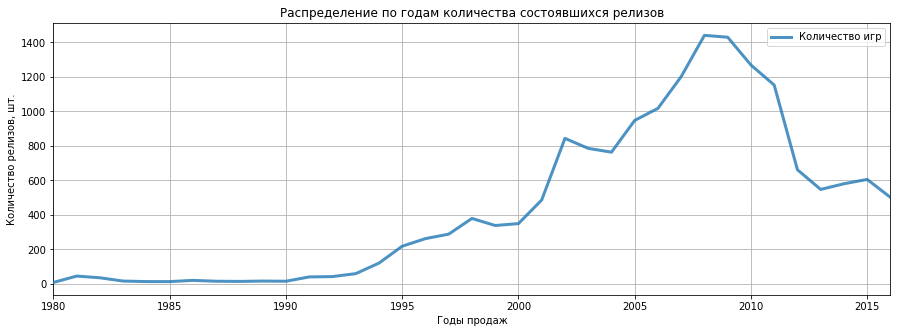

In [318]:
# Построим график зависимости количества вышедших игр от года выхода.
df.groupby('year_of_release')['name'].count().plot(figsize=(15, 5),  
   grid=True, legend=True, zorder=3, label = 'Количество игр', linewidth=3,  alpha=0.8)
plt.xlabel('Годы продаж')
plt.ylabel('Количество релизов, шт.')
plt.title('Распределение по годам количества состоявшихся релизов')

Text(0.5, 1.0, 'Распределение выручки по годам')

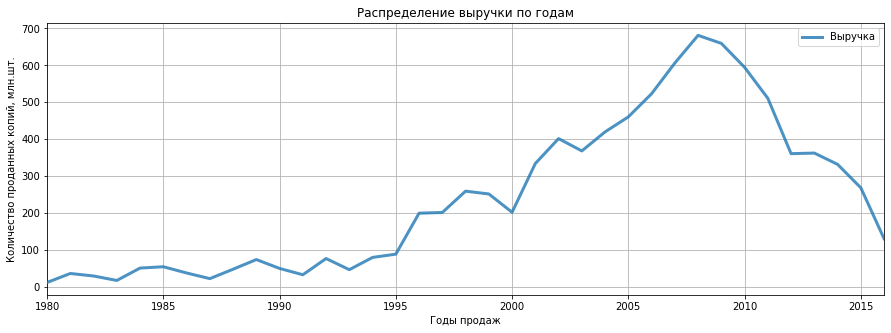

In [319]:
# Построим график зависимости выручки от года.
df.groupby('year_of_release')['total_sales'].sum().plot(figsize=(15, 5),  
   grid=True, legend=True, zorder=3, linewidth=3, label = 'Выручка', alpha=0.8)

plt.xlabel('Годы продаж')
plt.ylabel('Количество проданных копий, млн.шт.')
plt.title('Распределение выручки по годам')

По построенному графикам видно как менялся рынок игровой индустрии для представленных платформ. Лавинообразный рост, начиная с 2000 года сменился таким же падением начиная с 2007. Для исследования возьму данные, начиная с 2014 года, чтобы не учитывать уже несуществующих тенденций. 

### Изучение продаж относительно платформ

Text(0.5, 1.0, 'Распределение продаж относительно платформ')

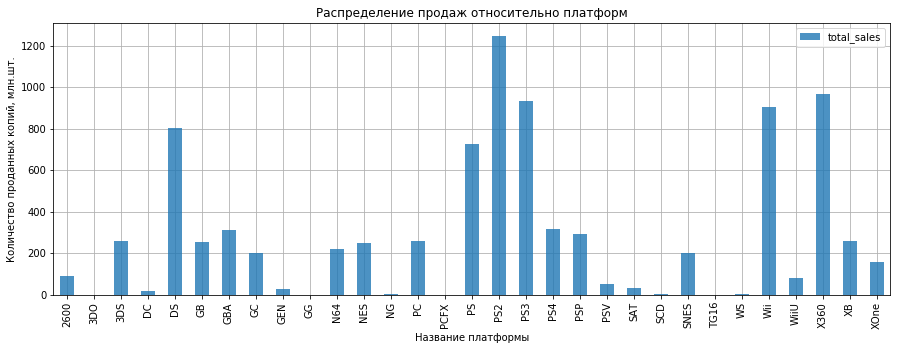

In [320]:
# Постороим диаграмму распределения продаж относительно платформ
df.groupby('platform')['total_sales'].sum().plot(kind='bar', figsize=(15, 5),  
grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)

plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий, млн.шт.')
plt.title('Распределение продаж относительно платформ')

Из построенной гистограммы видно, что наибольшие продажи относятся к платформам - DS, PS, PS2, PS3, Wii, X360

Text(0.5, 1.0, 'Распределение по годам количества проданных копий для наиболее популярных платформ')

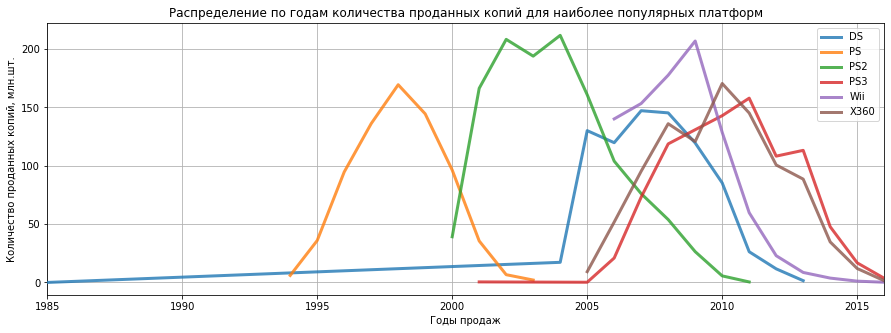

In [321]:
# Построим гоафик оаспределения продаж по годам для платформ DS, PS, PS2, PS3, Wii, X360
for platform in ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']:
    (df[df['platform'] == platform]
    .groupby('year_of_release')['total_sales'].sum().plot(figsize=(15, 5),  
grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8, label=platform)
    )
plt.xlabel('Годы продаж')
plt.ylabel('Количество проданных копий, млн.шт.')
plt.title('Распределение по годам количества проданных копий для наиболее популярных платформ')

Из построенных графиков видно, что средний срок популярности платформ ~10 лет (из которых продажи свыше 50 млн. копий составляют ~ 7 лет). 

Считаю, что данные по выходу игр до 2014 года можно не рассматривать и причим тому несколько
1. Часть платформ, которые были активными участниками рынка уже не поддерживаются (DS(с 2013), PS(с 2006), PS2(с 2013)
2. Пики выручки давно пройдены и идет уверенный спад продаж, поэтому нет смысла анализировать годы с большими продажами  

Text(0.5, 1.0, 'Распределение продаж относительно платформ в период с 2014 по 2016 гг')

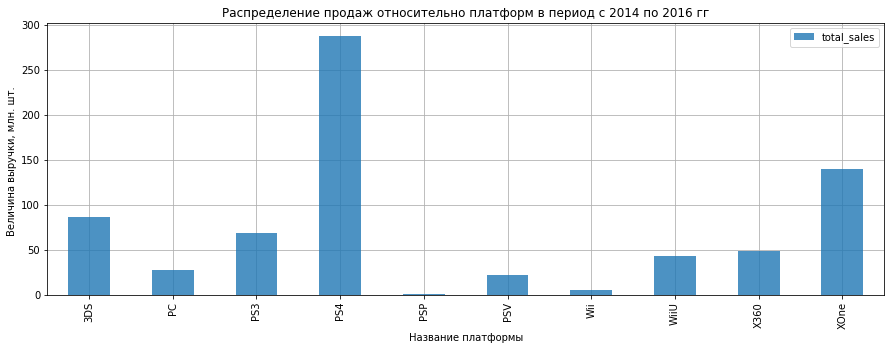

In [322]:
# Постороим диаграмму распределения продаж относительно платформ, сделав срез - продажи начиная с 2014 года
df.query('year_of_release > 2013').groupby('platform')['total_sales'].sum().plot(kind='bar', figsize=(15, 5),  
grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)

plt.xlabel('Название платформы')
plt.ylabel('Величина выручки, млн. шт. ')
plt.title('Распределение продаж относительно платформ в период с 2014 по 2016 гг')

Изучив построенную диаграмму можно сказать, что наиболее перспестивные платформы это - 3DS, PS3, PS4, X360, XOne.

X360 можно исключить, поддержка прекращена в 2016. 

PS3 также можно исключить, поддержка в EU прекращена в 2015, EA - в 2016, в Японии была прекращена в 2017 (думаю этот факт был легко предсказуем, а скорее еще и анонсирован)

Text(0.5, 1.0, 'Распределение по годам с 2014 по 2016 количества проданных копий для платформ для платформ 3DS, PS4, XOne')

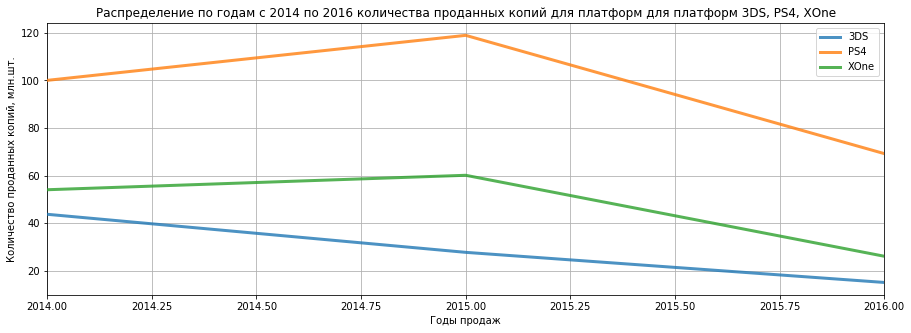

In [323]:
# Построим гоафик распределения продаж по годам с 2014 по 2016 для платформ 3DS, PS4, XOne
for platform in ['3DS', 'PS4', 'XOne']:
    (df[df['platform'] == platform]
    .query('year_of_release > 2013').groupby('year_of_release')['total_sales'].sum().plot(figsize=(15, 5),  
grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8, label=platform)
    )
plt.xlabel('Годы продаж')
plt.ylabel('Количество проданных копий, млн.шт.')
plt.title('Распределение по годам с 2014 по 2016 количества проданных копий для платформ для платформ 3DS, PS4, XOne')

Продажи у всех платформ падают. Наименьшая динамика падения у PS4 и XOne.

### Построение графика boxplot по глобальным продажам игр в разбивке по платформам

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Диаграммы размаха глобальных продаж для платформ')

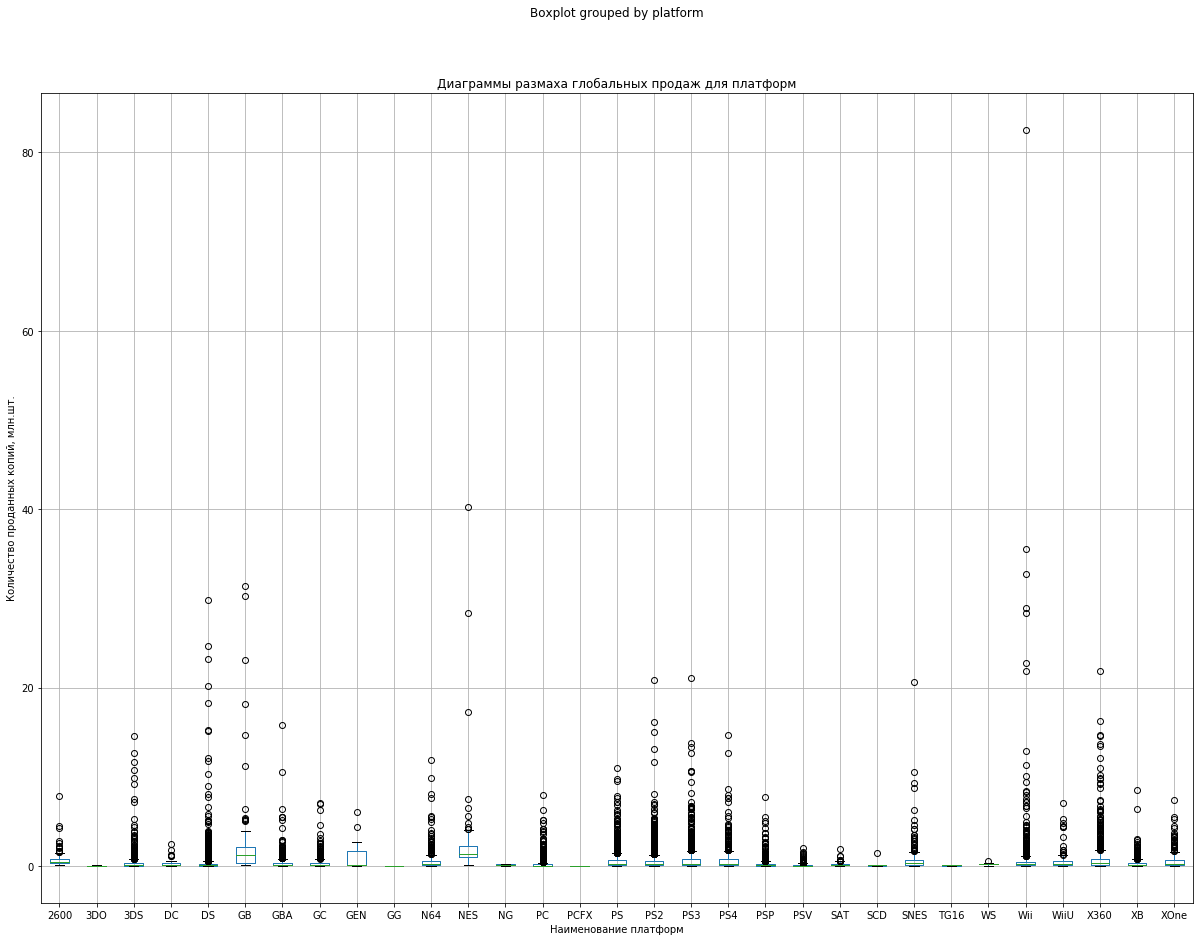

In [324]:
# Построим графики boxplot по глобальным продажам игр в разбивке по платформам

df.boxplot(column='total_sales', by='platform', figsize=(20, 15) )
plt.xlabel('Наименование платформ')
plt.ylabel('Количество проданных копий, млн.шт.')
plt.title('Диаграммы размаха глобальных продаж для платформ')

Из графика можно сделать следующие выводы:
- У части платформ наблюдаются очень сильные выбросы (самый большой у Wii), что говорит о том, что одна или несколько из игр имела большой успех
- Платформы серии PS и XBox показывают довольно стабильное распределение 

In [325]:
# Посмотри что за игра такая популярная
df.query('platform=="Wii"').max()

name               uDraw Studio: Instant Artist
platform                                    Wii
year_of_release                            2016
genre                                  Strategy
na_sales                                  41.36
eu_sales                                  28.96
jp_sales                                    4.7
other_sales                                8.45
critic_score                                 97
user_score                                  9.3
total_sales                               82.54
dtype: object

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Количество проданных копий, млн.шт.')

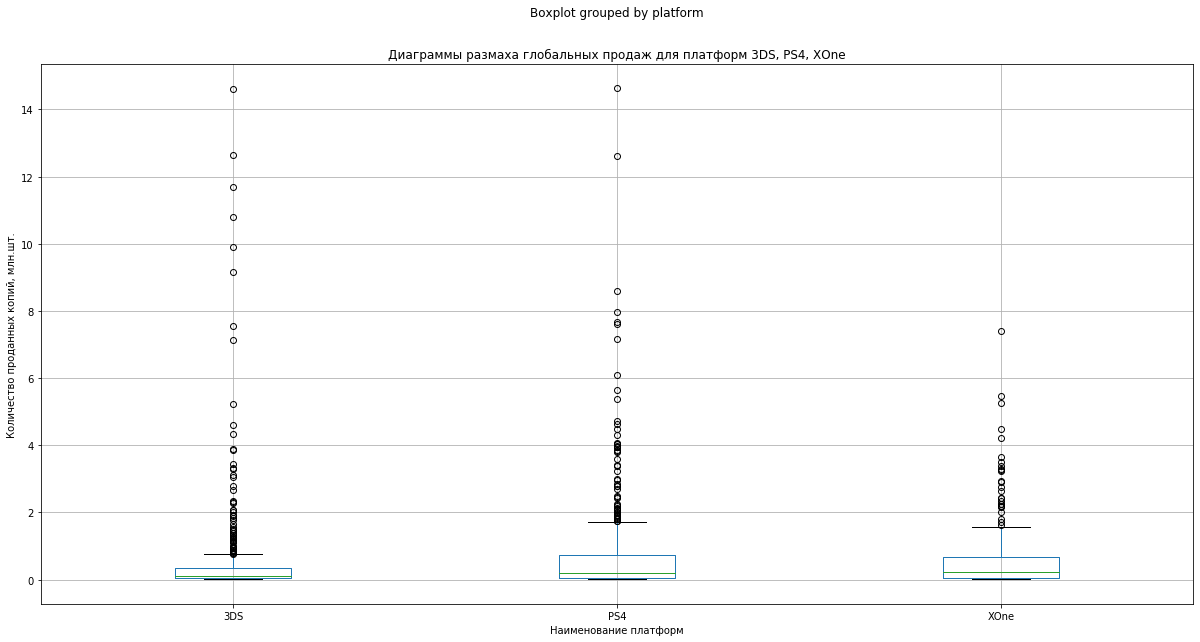

In [326]:
# Построим диаграммы размаха по наиболее перспективным платформам
df.query('platform == "3DS" or platform == "PS4" or platform == "XOne"').boxplot(column='total_sales', by='platform', 
                                                                                 figsize=(20, 10))
plt.title('Диаграммы размаха глобальных продаж для платформ 3DS, PS4, XOne')
plt.xlabel('Наименование платформ')
plt.ylabel('Количество проданных копий, млн.шт.')


Из диаграммы размаха можно сделать вывод, что для платформ PS4 и XOne медианы, как и максимальные значения сравнимы, а у платформы 3DS они значительно меньше. Это может говорить о том, что первые две платформы более стабильно продвигают игры на рынок. Поскольку большой успех игры зависит от многих факторов, а не только от конкретной платформы, то при невозможности исполнить игру для всех трех - я бы обратил внимание на более стабильно продвигающие. А поскольку медианное значение для XOne выше, то обратил бы внимание на нее.

### Построение диаграмм рассеяния и расчет корреляции между отзывами и продажами для платформ Wii и X360

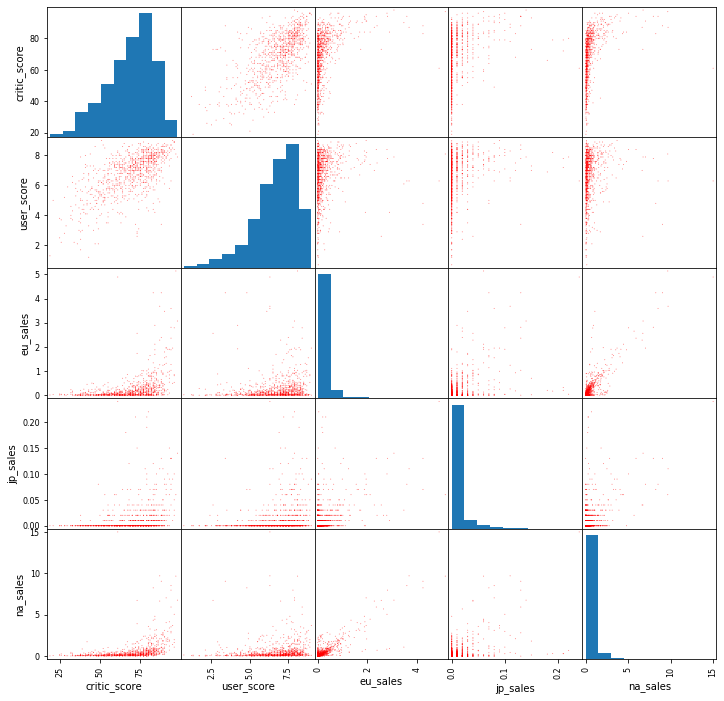

In [327]:
# Построим диаграмму рассеяния для платформы X360
pd.plotting.scatter_matrix(df.query('platform == "X360"')[['critic_score', 'user_score', 'eu_sales', 'jp_sales', 'na_sales']], figsize=(12, 12), color='r', s=4)
plt.show()

In [328]:
# Посчитаем корреляцию между отзывами и продажами для платформы X360
df.query('platform == "X360"')[['critic_score', 'user_score', 'eu_sales', 'jp_sales', 'na_sales', 'total_sales']].corr().style.background_gradient()

,critic_score,user_score,eu_sales,jp_sales,na_sales,total_sales
critic_score,1,0.623261,0.38369,0.283407,0.375711,0.391742
user_score,0.623261,1,0.108655,0.181948,0.106849,0.11365
eu_sales,0.38369,0.108655,1,0.462088,0.854861,0.932401
jp_sales,0.283407,0.181948,0.462088,1,0.486674,0.507127
na_sales,0.375711,0.106849,0.854861,0.486674,1,0.98438
total_sales,0.391742,0.11365,0.932401,0.507127,0.98438,1


Из диаграмм рассеяния и корреляции для платформы X360 можно сделать вывод, что влияние оценки критиков и пользователей напрямую не сильно влияет на продажи и является средней положительной. 

Прослеживается высокая положительная прямая зависимость между оценкой критиков и пользователей.

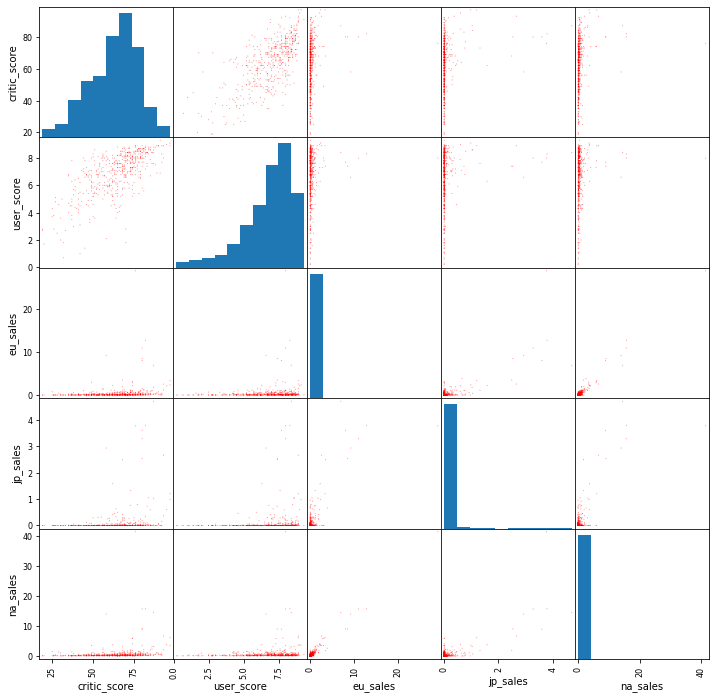

In [329]:
# Построим диаграмму рассеяния для платформы Wii
pd.plotting.scatter_matrix(df.query('platform == "Wii"')[['critic_score', 'user_score', 'eu_sales', 'jp_sales', 'na_sales']], figsize=(12, 12), color='r', s=4)
plt.show()

In [330]:
# Посчитаем корреляцию между отзывами и продажами для платформы Wii
df.query('platform == "Wii"')[['critic_score', 'user_score', 'eu_sales', 'jp_sales', 'na_sales', 'total_sales']].corr().style.background_gradient()

,critic_score,user_score,eu_sales,jp_sales,na_sales,total_sales
critic_score,1,0.682232,0.16428,0.197298,0.178681,0.177903
user_score,0.682232,1,0.104429,0.128226,0.113512,0.113467
eu_sales,0.16428,0.104429,1,0.776003,0.971791,0.989542
jp_sales,0.197298,0.128226,0.776003,1,0.769748,0.813783
na_sales,0.178681,0.113512,0.971791,0.769748,1,0.992603
total_sales,0.177903,0.113467,0.989542,0.813783,0.992603,1


Из диаграмм рассеяния и корреляции для платформы Wii можно сделать вывод, что влияние оценки критиков и пользователей напрямую практически не влияет на продажи и является слабой положительной. 

Прослеживается высокая положительная прямая зависимость между оценкой критиков и пользователей.

### Изучение распределения игр по жанрам

Text(0.5, 1.0, 'Распределение продаж относительно жанров')

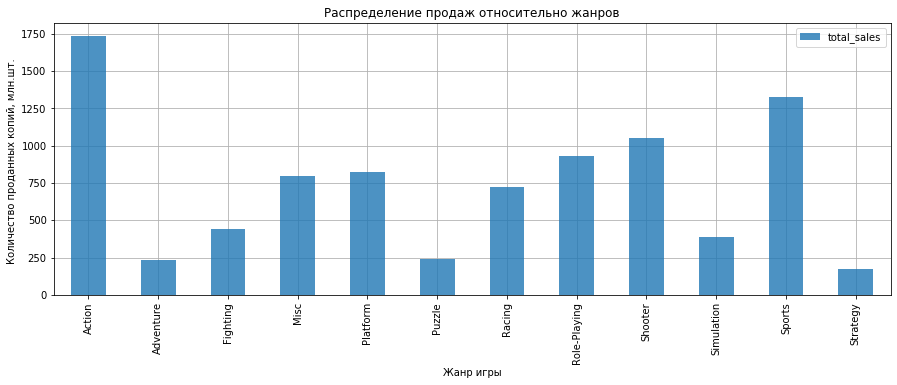

In [331]:
# Постороим диаграмму распределения продаж относительно жанров
df.groupby('genre')['total_sales'].sum().plot(kind='bar', figsize=(15, 5),  
grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)

plt.xlabel('Жанр игры')
plt.ylabel('Количество проданных копий, млн.шт. ')
plt.title('Распределение продаж относительно жанров')

Text(0.5, 1.0, 'Распределение продаж относительно жанров в период с 2014 по 2016 гг')

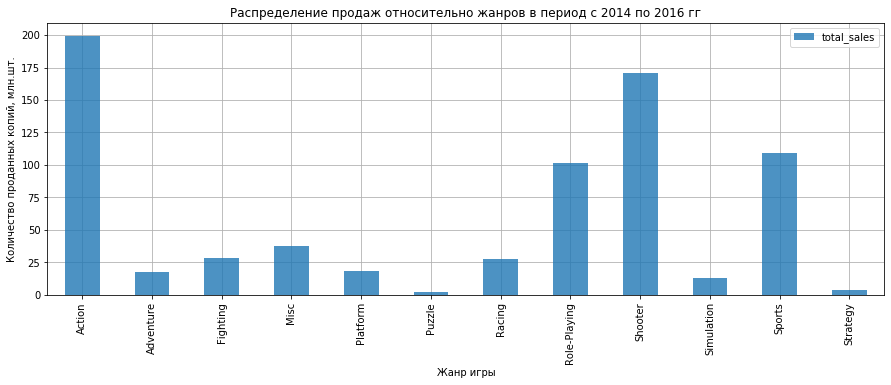

In [332]:
# Постороим диаграмму распределения продаж относительно жанров, сделав срез - продажи начиная с 2014 года
df.query('year_of_release > 2013').groupby('genre')['total_sales'].sum().plot(kind='bar', figsize=(15, 5),  
grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)

plt.xlabel('Жанр игры')
plt.ylabel('Количество проданных копий, млн.шт.')
plt.title('Распределение продаж относительно жанров в период с 2014 по 2016 гг')

Наиболее популярные жанры по убывание - Action, Shooter, Sports

Наимение популярные жанры по возрастанию - Puzzle, Strategy

### Выводы

По построенному графику статистики выпуска игр в зависимости от года видно как менялся рынок игровой индустрии для представленных платформ. Лавинообразный рост, начиная с 2000 года сменился таким же падением начиная с 2007. Для исследования возьму данные, начиная с 2014 года, чтобы не учитывать уже несуществующие тенденции.

Проведено изучение продаж относительно платформ
Наибольшие продажи относятся к платформам - DS, PS, PS2, PS3, Wii, X360
Из построенных графиков для 5 самых популярных платформ видно, что средний срок популярности платформ ~10 лет (из которых продажи свыше 50 млн. копий составляют ~ 7 лет).

Считаю, что данные по выходу игр до 2014 года можно не рассматривать и причим тому несколько
- Часть платформ, которые были активными участниками рынка уже не поддерживаются (DS(с 2013), PS(с 2006), PS2(с 2013)
- Пики выручки давно пройдены и идет уверенный спад продаж, поэтому нет смысла анализировать годы с большими продажами

Построив гистограмму для периода с 2014 по 2016 можно сказать, что наиболее перспестивные платформы это - 3DS, PS3, PS4, X360, XOne, однако:
- X360 можно исключить, поддержка прекращена в 2016.
- PS3 также можно исключить, поддержка в EU прекращена в 2015, EA - в 2016, в Японии была прекращена в 2017 (думаю этот факт был легко предсказуем, а скорее еще и анонсирован)

Построив график распределения продаж по годам с 2014 по 2016 для платформ 3DS, PS4, XOne приходим к выводу, продажи у всех платформ падают. Наименьшая динамика падения у PS4 и XOne.

Из диаграммы размаха для всех платформ можно сделать следующие выводы:
- У части платформ наблюдаются очень сильные выбросы (самый большой у Wii), что говорит о том, что одна или несколько из игр имела большой успех
- Платформы серии PS и XBox показывают довольно стабильное распределение 

Из диаграммы размаха наиболее перспективных платформ можно сделать вывод, что для платформ PS4 и XOne медианы, как и максимальные значения сравнимы, а у платформы 3DS они значительно меньше. Это может говорить о том, что первые две платформы более стабильно продвигают игры на рынок. Поскольку большой успех игры зависит от многих факторов, а не только от конкретной платформы, то при невозможности исполнить игру для всех трех - я бы обратил внимание на более стабильно продвигающие. А поскольку медианное значение для XOne выше, то обратил бы внимание на нее.

Из диаграмм рассеяния и корреляции для платформы X360 можно сделать вывод, что влияние оценки критиков и пользователей напрямую не сильно влияет на продажи и является средней положительной.

Из диаграмм рассеяния и корреляции для платформы Wii можно сделать вывод, что влияние оценки критиков и пользователей напрямую практически не влияет на продажи и является слабой положительной.

В обоих случаях прослеживается высокая положительная прямая зависимость между оценкой критиков и пользователей.

Наиболее популярные жанры по убывание - Action, Shooter, Sports
Наимение популярные жанры по возрастанию - Puzzle, Strategy
Интересно, что разница между продажами жанра Puzzle и Action огромна и достигает ~ 200 млн. копий


## Составления портрета пользователя для каждого региона

### Функция для проведения анализа по регионам

In [333]:
def region (df, region_sales):
    # Постороим диаграмму распределения продаж относительно жанров
    df.groupby('genre')[region_sales].sum().nlargest(5).plot(kind='bar', figsize=(15, 5),  
    grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
    
    plt.xlabel('Жанр игры')
    plt.ylabel('Количество проданных игр, млн. шт.')
    
    if region_sales == 'na_sales':
        plt.title('Распределение продаж относительно жанров для Северной Америки')
    elif region_sales == 'eu_sales':
        plt.title('Распределение продаж относительно жанров для Европы')
    elif region_sales == 'jp_sales':
        plt.title('Распределение продаж относительно жанров для Японии')
    plt.show()
    
    # Постороим диаграмму распределения продаж относительно платформ
    df.groupby('platform')[region_sales].sum().nlargest(5).plot(kind='bar', figsize=(15, 5),  
    grid=True, legend=True, zorder=3, linewidth=3,  alpha=0.8)
   
    plt.xlabel('Платформа')
    plt.ylabel('Количество проданных игр, млн. шт.')
    
    if region_sales == 'na_sales':
        plt.title('Распределение продаж относительно платформ для Северной Америки')
    elif region_sales == 'eu_sales':
        plt.title('Распределение продаж относительно платформ для Европы')
    elif region_sales == 'jp_sales':
        plt.title('Распределение продаж относительно платформ для Японии')
    plt.show()    
      

### Анализ распределения продаж по жанрам и платформам для Европы

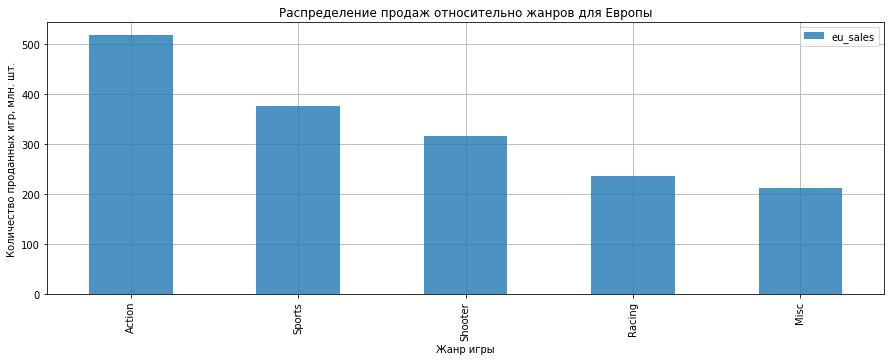

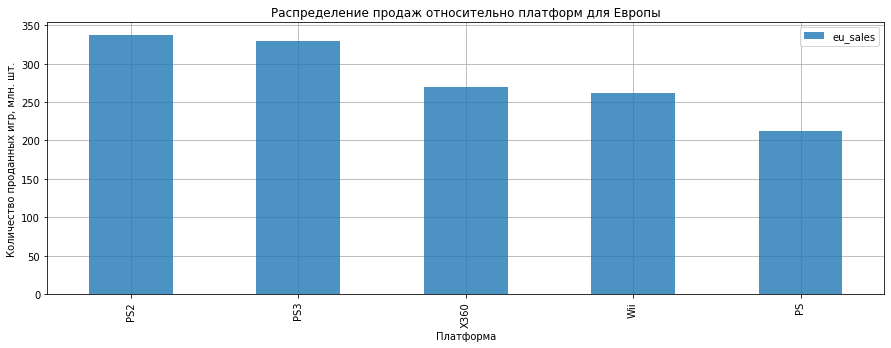

In [334]:
region (df, 'eu_sales')

Для Европы самые популярные жанры в порядке убывания популярности - Action, Sports, Shooter, Racing и Misc.
Т.е. популярны динамичные игры
Самые популярные платформы это PS2 и PS3, за ними идут X360, Wii и снова PS

### Анализ распределения продаж по жанрам и платформам для Северной Америки

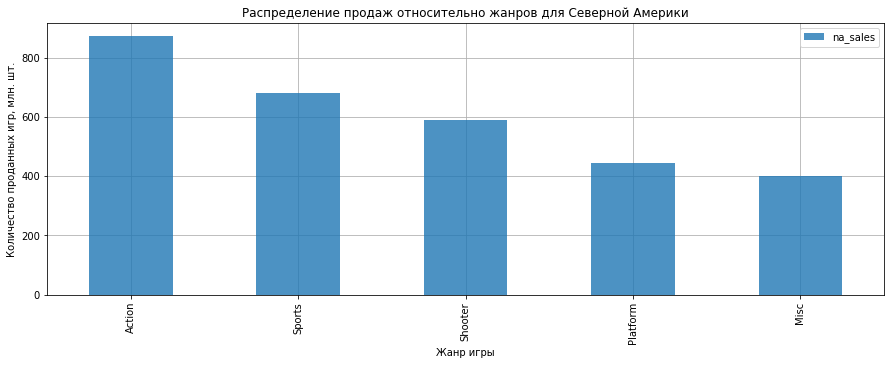

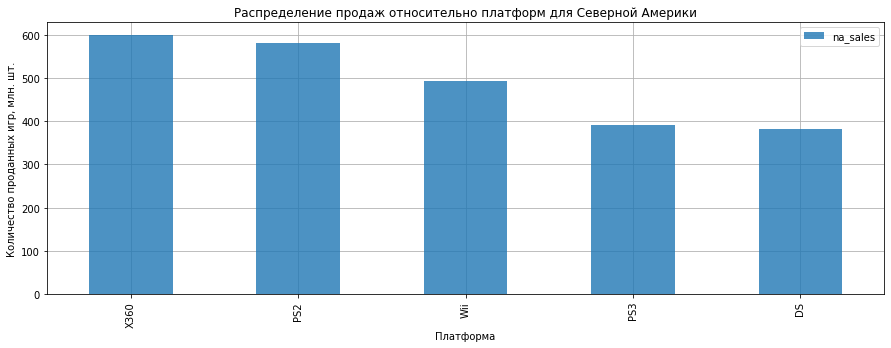

In [335]:
region (df, 'na_sales')

Для Северной Америки самые популярные жанры в порядке убывания популярности - Action, Sports, Shooter, Platform и Misc.
Единственное отличие от предпочтений европейцев - Platform вместо Racing 
Самые популярные платформы это X360, PS2, Wii, PS3 и DS. 

### Анализ распределения продаж по жанрам и платформам для Японии

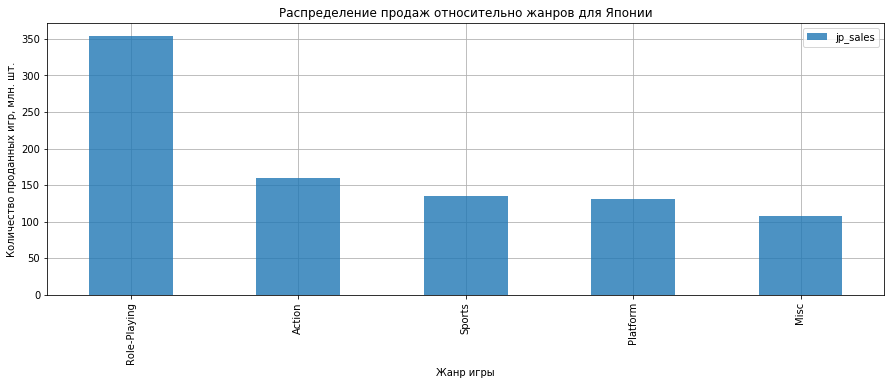

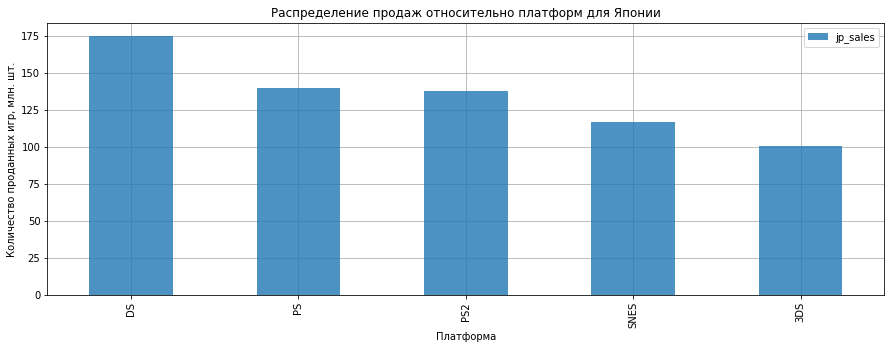

In [336]:
region (df, 'jp_sales')

Для Японии самые популярные жанры в порядке убывания популярности - Role-Playing, Action, Sports, Platform и Misc.
В данном случае отличия прослеживаются смльнее. Первое место с большим отрывом занимает Role-Playing - видимо это отражение культурного своеобразия самой Японии, а именно желания отыграть в виртуальном мире роль, невозможную в реальной жизни. Еще одно сильное отличие - отсутствие в пятерке лидеров Shooter'ов.  
В плане выбора платформ Япония самая консервативная. DS, PS, PS2, SNES и 3DS 

In [337]:
# Сформируем сводную таблицу для определения влияния рейтинга ESRB на продажи
df.pivot_table( values=['na_sales', 'eu_sales', 'jp_sales'], columns=['rating'])

rating,AO,E,E10+,EC,K-A,M,RP,T
eu_sales,0.61,0.179181,0.133385,0.01375,0.090000,0.310920,0.02,0.144560
jp_sales,0.00,0.050030,0.028470,0.00000,0.486667,0.040933,0.00,0.051495
na_sales,1.26,0.325417,0.249688,0.19125,0.853333,0.480663,0.00,0.256403


В Северной Америке очень популярны игры с рейтингом AO - «Adults Only 18+»
На втором месте по популярности с рейтингом K-A или в нынешнем варианте Е 

В Европе популярность игр с рейтингом AO в два раза ниже, чем в Северной Америке, но тоже самые популярные.
А вот на втором месте в Европе игры с маркировкой М

Интересное наблюдение - в Японии очень распространены игры с маркировкой К-А, а вот с маркировкой Е распространены не сильно. Поскольку это маркировка одного и того же типа игр просто применяемая в разные годы (К-А - раньше), - можно сделать вывод, что новые игры в Японии распространены меньше.

Из всего вышеизложенного я бы сказал, что этот рейтинг сильнее влияет на продажи в Северной Америке

### Выводы

Для Европы самые популярные жанры в порядке убывания популярности - Action, Sports, Shooter, Racing и Misc.  

Самые популярные платформы это PS2 и PS3, за ними идут X360, Wii и снова PS

Для Северной Америки самые популярные жанры в порядке убывания популярности - Action, Sports, Shooter, Platform и Misc. Единственное отличие от предпочтений европейцев - Platform вместо Racing. 

Самые популярные платформы это X360, PS2, Wii, PS3 и DS.

Для Японии самые популярные жанры в порядке убывания популярности - Role-Playing, Action, Sports, Platform и Misc. В данном случае отличия прослеживаются сильнее. Первое место с большим отрывом занимает Role-Playing - видимо это отражение культурного своеобразия самой Японии, а именно желания отыграть в виртуальном мире роль, невозможную в реальной жизни. Еще одно сильное отличие - отсутствие в пятерке лидеров Shooter'ов.

В плане выбора платформ Япония самая консервативная. DS, PS, PS2, SNES и 3DS

В Северной Америке очень популярны игры с рейтингом AO - «Adults Only 18+»
На втором месте по популярности с рейтингом K-A или в нынешнем варианте Е 

В Европе популярность игр с рейтингом AO в два раза ниже, чем в Северной Америке, но тоже самые популярные.
А вот на втором месте в Европе игры с маркировкой М

Интересное наблюдение - в Японии очень распространены игры с маркировкой К-А, а вот с маркировкой Е распространены не сильно. Поскольку это маркировка одного и того же типа игр просто применяемая в разные годы (К-А - раньше), - можно сделать вывод, что новые игры в Японии распространены меньше.

Из всего вышеизложенного я бы сказал, что этот рейтинг сильнее влияет на продажи в Северной Америке

## Формулирование и проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [338]:
# Нулевая гипотеза -  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

# Альтернативная гипотеза -  Средние пользовательские рейтинги платформ Xbox One и PC различаются

# критический уровень статистической значимости
alpha = 0.05  

# Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(df.query('platform == "XOne" and user_score != "nan"')['user_score'], df.query('platform == "PC" and user_score != "nan"')['user_score'], equal_var=False)
# Поскольку дисперсии генеральных совокупностей не равны equal_var=False

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Из расчета видно, что нулевая гипотеза не верна, т.е. средние пользовательские рейтинги платформ Xbox One и PC разные

### Средние пользовательские рейтинги жанров Action и Sports одинаковые

In [339]:
# Нулевая гипотеза -  Средние пользовательские рейтинги жанров Action и Sports одинаковые

# Альтернативная гипотеза -  Средние пользовательские рейтинги жанров Action и Sports различаются

# критический уровень статистической значимости
alpha = 0.05 

# Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(df.query('genre == "Sports" and user_score != "nan"')['user_score'], df.query('genre == "Action" and user_score != "nan"')['user_score'], equal_var=False)
# Поскольку дисперсии генеральных совокупностей не равны equal_var=False



if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Из расчета видно, что нулевая гипотеза верна, т.е. средние пользовательские рейтинги жанров Action и Sports одинаковые

### Выводы

Провели проверку гипотез:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - расчет показал, что гипотеза не верна, т.е. средние пользовательские рейтинги платформ Xbox One и PC разные

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - расчет показал, что гипотеза не верна, т.е. средние пользовательские рейтинги жанров Action и Sports одинаковые

## Выводы

По построенному графику статистики выпуска игр в зависимости от года видно как менялся рынок игровой индустрии для представленных платформ. Лавинообразный рост, начиная с 2000 года сменился таким же падением начиная с 2007. Для исследования возьму данные, начиная с 2014 года, чтобы не учитывать уже несуществующие тенденции.

Проведено изучение продаж относительно платформ
Наибольшие продажи относятся к платформам - DS, PS, PS2, PS3, Wii, X360
Из построенных графиков для 5 самых популярных платформ видно, что средний срок популярности платформ ~10 лет (из которых продажи свыше 50 млн. копий составляют ~ 7 лет).

Считаю, что данные по выходу игр до 2014 года можно не рассматривать и причим тому несколько
- Часть платформ, которые были активными участниками рынка уже не поддерживаются (DS(с 2013), PS(с 2006), PS2(с 2013)
- Пики выручки давно пройдены и идет уверенный спад продаж, поэтому нет смысла анализировать годы с большими продажами

Построив гистограмму для периода с 2014 по 2016 можно сказать, что наиболее перспестивные платформы это - 3DS, PS3, PS4, X360, XOne, однако:
- X360 можно исключить, поддержка прекращена в 2016.
- PS3 также можно исключить, поддержка в EU прекращена в 2015, EA - в 2016, в Японии была прекращена в 2017 (думаю этот факт был легко предсказуем, а скорее еще и анонсирован)

Построив график распределения продаж по годам с 2014 по 2016 для платформ 3DS, PS4, XOne приходим к выводу, продажи у всех платформ падают. Наименьшая динамика падения у PS4 и XOne.

Из диаграммы размаха для всех платформ можно сделать следующие выводы:
- У части платформ наблюдаются очень сильные выбросы (самый большой у Wii), что говорит о том, что одна или несколько из игр имела большой успех
- Платформы серии PS и XBox показывают довольно стабильное распределение 

Из диаграммы размаха наиболее перспективных платформ можно сделать вывод, что для платформ PS4 и XOne медианы, как и максимальные значения сравнимы, а у платформы 3DS они значительно меньше. Это может говорить о том, что первые две платформы более стабильно продвигают игры на рынок. Поскольку большой успех игры зависит от многих факторов, а не только от конкретной платформы, то при невозможности исполнить игру для всех трех - я бы обратил внимание на более стабильно продвигающие. А поскольку медианное значение для XOne выше, то обратил бы внимание на нее.

Из диаграмм рассеяния и корреляции для платформы X360 можно сделать вывод, что влияние оценки критиков и пользователей напрямую не сильно влияет на продажи и является средней положительной.

Из диаграмм рассеяния и корреляции для платформы Wii можно сделать вывод, что влияние оценки критиков и пользователей напрямую практически не влияет на продажи и является слабой положительной.

В обоих случаях прослеживается высокая положительная прямая зависимость между оценкой критиков и пользователей.

Наиболее популярные жанры по убывание - Action, Shooter, Sports
Наимение популярные жанры по возрастанию - Puzzle, Strategy
Интересно, что разница между продажами жанра Puzzle и Action огромна и достигает ~ 200 млн. копий

Для Европы самые популярные жанры в порядке убывания популярности - Action, Sports, Shooter, Racing и Misc.  

Самые популярные платформы это PS2 и PS3, за ними идут X360, Wii и снова PS

Для Северной Америки самые популярные жанры в порядке убывания популярности - Action, Sports, Shooter, Platform и Misc. Единственное отличие от предпочтений европейцев - Platform вместо Racing. 

Самые популярные платформы это X360, PS2, Wii, PS3 и DS.

Для Японии самые популярные жанры в порядке убывания популярности - Role-Playing, Action, Sports, Platform и Misc. В данном случае отличия прослеживаются сильнее. Первое место с большим отрывом занимает Role-Playing - видимо это отражение культурного своеобразия самой Японии, а именно желания отыграть в виртуальном мире роль, невозможную в реальной жизни. Еще одно сильное отличие - отсутствие в пятерке лидеров Shooter'ов.

В плане выбора платформ Япония самая консервативная. DS, PS, PS2, SNES и 3DS

В Северной Америке очень популярны игры с рейтингом AO - «Adults Only 18+»
На втором месте по популярности с рейтингом K-A или в нынешнем варианте Е 

В Европе популярность игр с рейтингом AO в два раза ниже, чем в Северной Америке, но тоже самые популярные.
А вот на втором месте в Европе игры с маркировкой М

Интересное наблюдение - в Японии очень распространены игры с маркировкой К-А, а вот с маркировкой Е распространены не сильно. Поскольку это маркировка одного и того же типа игр просто применяемая в разные годы (К-А - раньше), - можно сделать вывод, что новые игры в Японии распространены меньше.

Из всего вышеизложенного я бы сказал, что этот рейтинг сильнее влияет на продажи в Северной Америке

Провели проверку гипотез:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - расчет показал, что гипотеза не верна, т.е. средние пользовательские рейтинги платформ Xbox One и PC разные

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - расчет показал, что гипотеза не верна, т.е. средние пользовательские рейтинги жанров Action и Sports одинаковые

Основываясь на вышеизложенном:
Я бы предложил разделить рекламные компании на регион Япония и все остальные, поскольку прослеживается существенное отличие в предпочитаемых жанрах, а именно - для Японии ставка на жанр Role-Playing, а для остальных регионов на Action. 
С точки зрения универсальной рекламной компании сделал бы ставку на жанры Action и Sport.
По рассматриваемым платформам (если брать поддерживаемые) я бы предложил рассматривать PS4 (для всех регионов) и XOne (без учета региона Япония). Предположу, что пользователям удобнее переходить на аналогичные своим платформы более старшего поколения.